In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

100%|██████████| 751k/751k [00:00<00:00, 804kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [ ]:
import os
new_path = os.listdir(path)
print(new_path)

['loan_data.csv']


In [ ]:
data = pd.read_csv(path + "/loan_data.csv")
print(data.head(5))

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [ ]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
data["person_home_ownership"] = data["person_home_ownership"].fillna(data["person_home_ownership"].mode())

In [ ]:
data["loan_intent"] = data["loan_intent"].fillna(data["loan_intent"].mode())

In [ ]:
data = data.drop('loan_percent_income', axis=1)

In [ ]:
data.isnull().any()

,0
person_age,False
person_gender,False
person_education,False
person_income,False
person_emp_exp,False
person_home_ownership,False
loan_amnt,False
loan_intent,False
loan_int_rate,False
cb_person_cred_hist_length,False


In [ ]:
data["loan_status"].value_counts()

,count
loan_status,
0,35000
1,10000


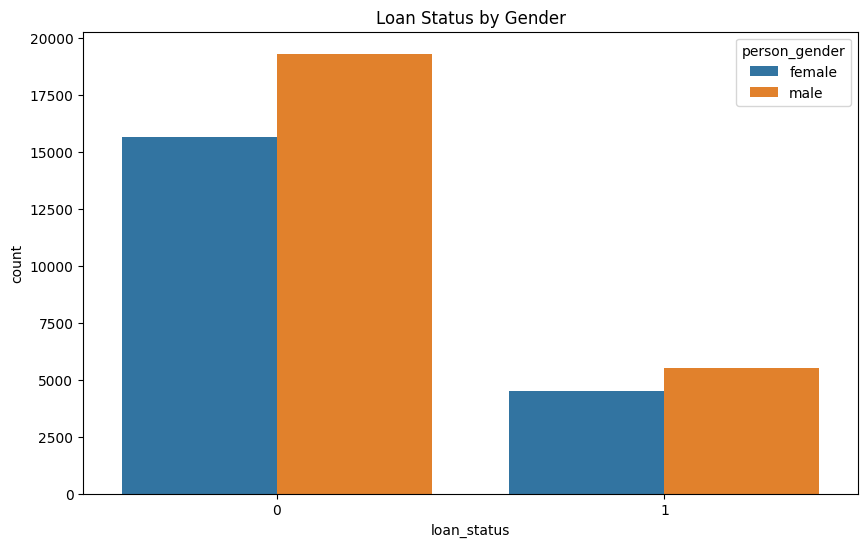

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x="loan_status", data=data, hue="person_gender")
plt.title("Loan Status by Gender")
plt.show()


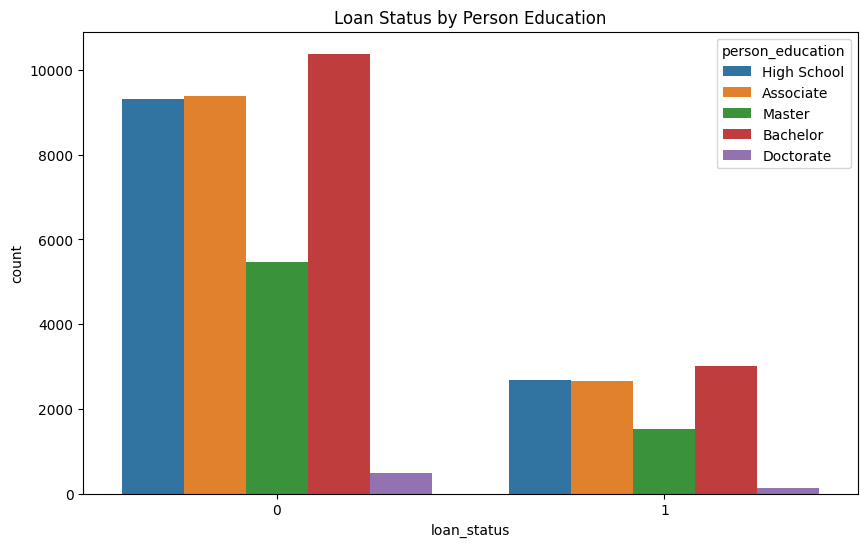

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x="loan_status", data=data, hue="person_education")
plt.title("Loan Status by Person Education")
plt.show()

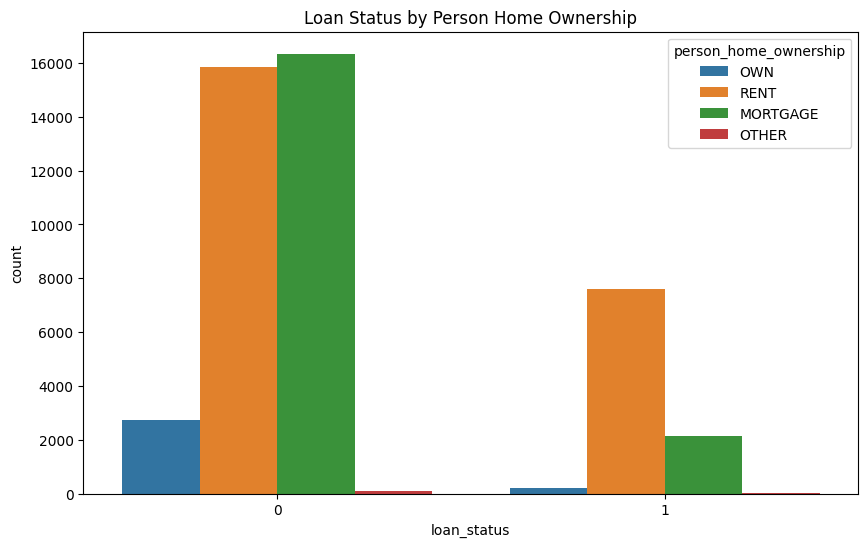

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x="loan_status", data=data, hue="person_home_ownership")
plt.title("Loan Status by Person Home Ownership")
plt.show()


In [ ]:
data["previous_loan_defaults_on_file"] = data["previous_loan_defaults_on_file"].map({"Yes": 1, "No": 0})

In [ ]:
data["person_education"].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [ ]:
data["person_education"] = data["person_education"].map({"High School": 0, "Bachelor": 1, "Associate": 2, "Master": 3, "Doctorate":4})

In [ ]:
data["person_home_ownership"].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [ ]:
data["person_home_ownership"] = data["person_home_ownership"].map({"RENT": 0, "OWN": 1, "MORTGAGE": 2, "OTHER":3})

In [ ]:
data["loan_intent"].value_counts()

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


In [ ]:
data["loan_intent"] = data["loan_intent"].map({"PERSONAL": 0, "EDUCATION": 1, "VENTURE": 2, "HOMEIMPROVEMNT":3, "MEDICAL":4,"DEBTCONSOLIDATIION":5})

In [ ]:
new_data= data.copy()

In [ ]:
new_data = new_data.drop(columns=["person_age","person_gender"])

In [ ]:
X = new_data.drop("loan_status",axis=1)
y = new_data["loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = rfc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9214444444444444


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(rfc_model, X, y, cv=10)

print("Cross-validation scores:", scores)
mean = scores.mean()
print("Mean score:", mean)

Cross-validation scores: [0.92       0.88444444 0.91244444 0.91844444 0.91088889 0.91022222
 0.91911111 0.93288889 0.928      0.93377778]
Mean score: 0.9170222222222222


In [ ]:
import joblib

# Save the trained model
joblib.dump(rfc_model, 'rfcmodel.pkl')


['rfcmodel.pkl']

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.78      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000

